In [1]:
# what is the marks distribution of 1000000 students doing a paper of 10000 "True or False" question, with 1 mark par question?
import numpy as np
import random
list_mark = []
list1=[0,1]
student_number = 1000000
question_number = 10000
mean = question_number/2
for i in range(student_number):
  mark = 0
  for j in range(question_number): 
    mark += random.choice(list1) 
  list_mark.append(mark)

In [3]:
# This list takes around 2-3 hours to run, so you better save the list after generating it!
# To save it, one choice is to convert it to pandas dataframe then to csv file.
# Then download the csv file.
# you may call the csv file by uploading it the csv file and use it.  
import pandas as pd

data1 = {"marks": list_mark}
df1 = pd.DataFrame(data1) # add index=0 inside if error
df1.to_csv("list_random_mark.csv")

# remember to download the file!

In [75]:
# now you may call the downloaded csv file anywhere
from google.colab import files
uploaded = files.upload()

Saving list_random_mark.csv to list_random_mark.csv


In [11]:
list_mark_called = pd.read_csv("list_random_mark.csv", header=0) 
list_mark_called = list(list_mark_called.iloc[:,1])

In [12]:
len(list_mark_called)

1000000

In [13]:
type(list_mark_called)

list

In [14]:
sum(list_mark_called)

4999950884

In [15]:
import math
def variance(data, ddof=0):
  n = len(data)
  mean = sum(data) / n
  return sum( (x - mean)**2 for x in data) / (n - ddof)

def stdev(data):
  var = variance(data)
  std_dev = math.sqrt(var)
  return std_dev

sigma = stdev(list_mark_called)
print(sigma)

49.96725327270194


In [16]:
import pandas as pd
Total_sigma1=0
Total_sigma2=0
Total_sigma3=0
Total_sigma4=0

for mark in list_mark_called:
  if mark >= (5000-sigma) and mark<= (5000+sigma):
    Total_sigma1+=1
  if mark >= (5000-2*sigma) and mark<= (5000+2*sigma):
    Total_sigma2+=1
  if mark >= (5000-3*sigma) and mark<= (5000+3*sigma):
    Total_sigma3+=1
  if mark >= (5000-4*sigma) and mark<= (5000+4*sigma):
    Total_sigma4+=1

Dict1 = {"μ ± σ":Total_sigma1/10000, "μ ± 2σ":Total_sigma2/10000, "μ ± 3σ":Total_sigma3/10000, "μ ± 4σ":Total_sigma4/10000}
df1 = pd.DataFrame(Dict1, index=["Expected fraction of data inside the range"]).T
df1

,Expected fraction of data inside the range
μ ± σ,67.8013
μ ± 2σ,95.3683
μ ± 3σ,99.7283
μ ± 4σ,99.9939


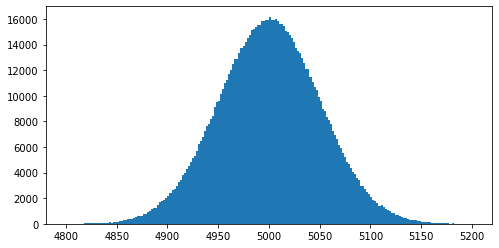

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(list_mark, bins=200, range=(4800,5200))
plt.show() 

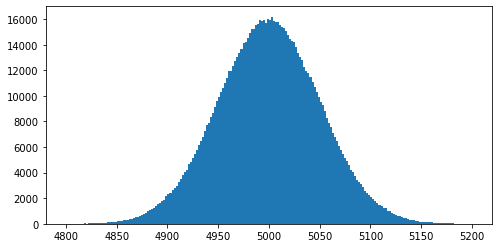

In [19]:
x = np.random.normal(5000, sigma, 1000000)

plt.figure(figsize=(8,4))
plt.hist(x, bins=200, range=(4800,5200))
plt.show() 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [22]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - 5000)**2 / (2*sigma ** 2))
    
x = np.random.normal(5000, sigma, size=10000)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


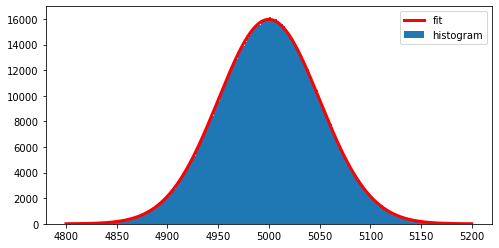

In [79]:
plt.figure(figsize=(8,4))
bin_heights, bin_borders, _ = plt.hist(list_mark_called, bins=200, range=(4800,5200), label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', c='red', linewidth=3)
plt.legend()